# Procesamiento Adaptativo de Señales Aleatorias
# Trabajo Práctico N°2 - Filtro óptimo
## Grupo 3
* Santiago Arribere
* Matías Francois
* Joaquín Gaytan
* Pablo Scheinfeld

# TODO

# 1. Señales de prueba
Se buscará medir la respuesta impulsiva de una habitación empleando las siguientes señales de prueba.

* Señal de voz
* Señal de música
* Señal rectangular ($f=100Hz$)
* Barrido lineal de frecuencia ($f_0=20Hz$, $f_1=20kHz$)
* Barrido exponencial de frecuencia ($f_0=20Hz$, $f_1=20kHz$)
* Ruido blanco gaussiano ($\mu_N = 0$)

Cada una de estas señales tendrá una duración de diez segundos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sps
from IPython.display import Audio
from scipy.io import wavfile

In [2]:
# Define samplerate for input signals
samplerate = 48000 # Hz

# Define track length
tracklen = 10 # sec

In [3]:
def _print_signal(x, y, title, color='blue', xlim=None):
    plt.figure(figsize=(25,5))
    plt.plot(x, y, color=color)
    plt.grid()
    plt.title(title, fontsize=20)
    plt.xlabel('Time (sec)')
    if (xlim != None):
        if (len(xlim) == 2):
            plt.xlim(xlim[0],xlim[1])
    plt.show()

In [4]:
def print_signal(x, y, title, samplerate=None, color='blue', xlim=None, window='hann', ylim=None):
    fig, axs = plt.subplots(2, 1, figsize=(25,10))
    fig.suptitle(title, fontsize=20)
    
    # Time plot
    axs[0].grid()
    axs[0].set_xlabel('Time [sec]')
    if (xlim != None):
        if (len(xlim) == 2):
            axs[0].set_xlim(xlim[0],xlim[1])
    axs[0].plot(x, y, color=color)
            
    # Spectrogram plot
    if samplerate != None:
        f, t, Sxx = sps.spectrogram(y, samplerate, window=window, nperseg=256, noverlap=64)
        axs[1].set_ylabel('Frequency [Hz]')
        axs[1].set_xlabel('Time [sec]')
        if (ylim != None):
            if (len(ylim) == 2):
                axs[1].set_ylim(ylim[0],ylim[1])
        axs[1].pcolormesh(t, f, Sxx, shading='gouraud')

In [5]:
def to_wav(track, samplerate, filename, scale = 1):
    scaled_track = np.int16(track*32767*scale)
    wavfile.write(filename, samplerate, scaled_track)
    return scaled_track

## 1.1 Señal de voz

In [6]:
# Load voice track
voice_path = '../assets/test_signals/whereIam48Khz.wav'
voice_rate, voice = wavfile.read(voice_path)

# Check sample rate
print(f'Sample rate: {voice_rate}[Hz]')

Sample rate: 48000[Hz]


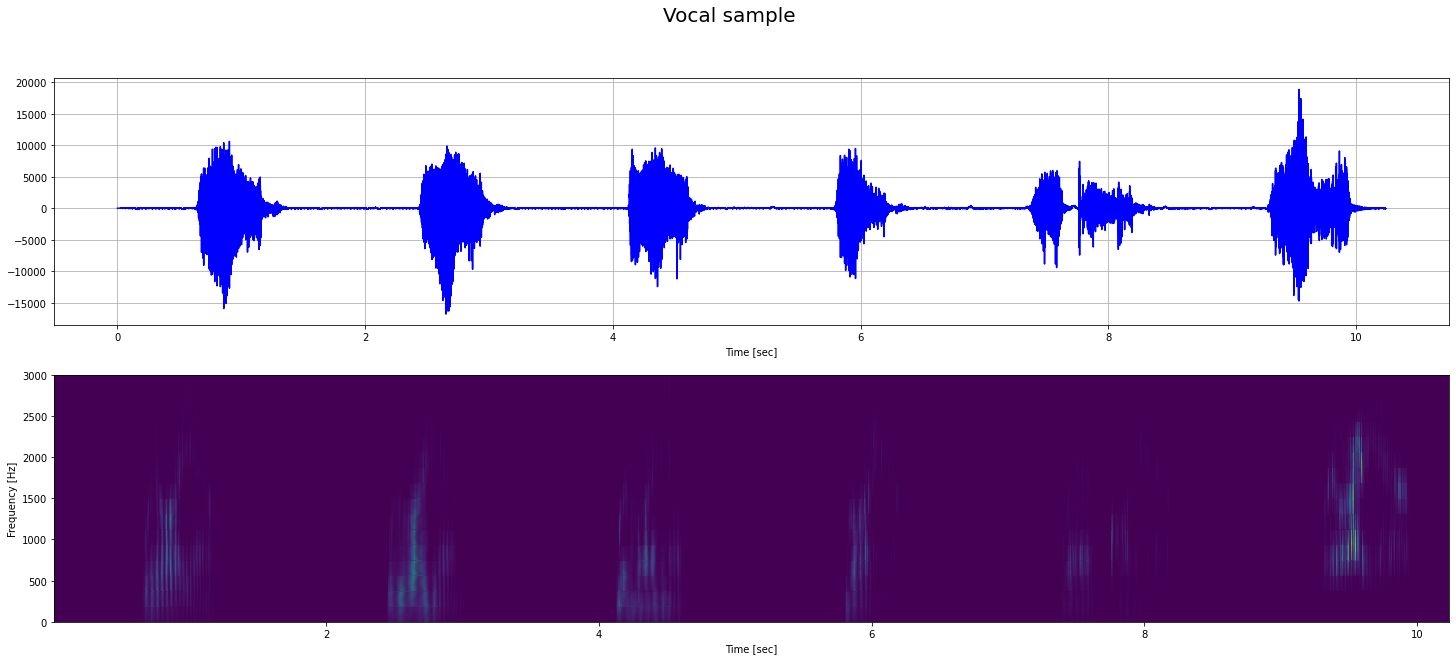

In [7]:
print_signal(np.arange(0,voice.shape[0], 1) / voice_rate, voice, 'Vocal sample', samplerate=samplerate, xlim=None, ylim=(0,3000))

In [8]:
# Play WAV file
Audio(voice_path)

## 1.2 Señal de música

In [23]:
# Load song
song_path = '../assets/test_signals/darkside_mono.wav'
song_rate, song = wavfile.read(song_path)

# Check sample rate
print(f'Sample rate: {song_rate}[Hz]')

Sample rate: 48000[Hz]


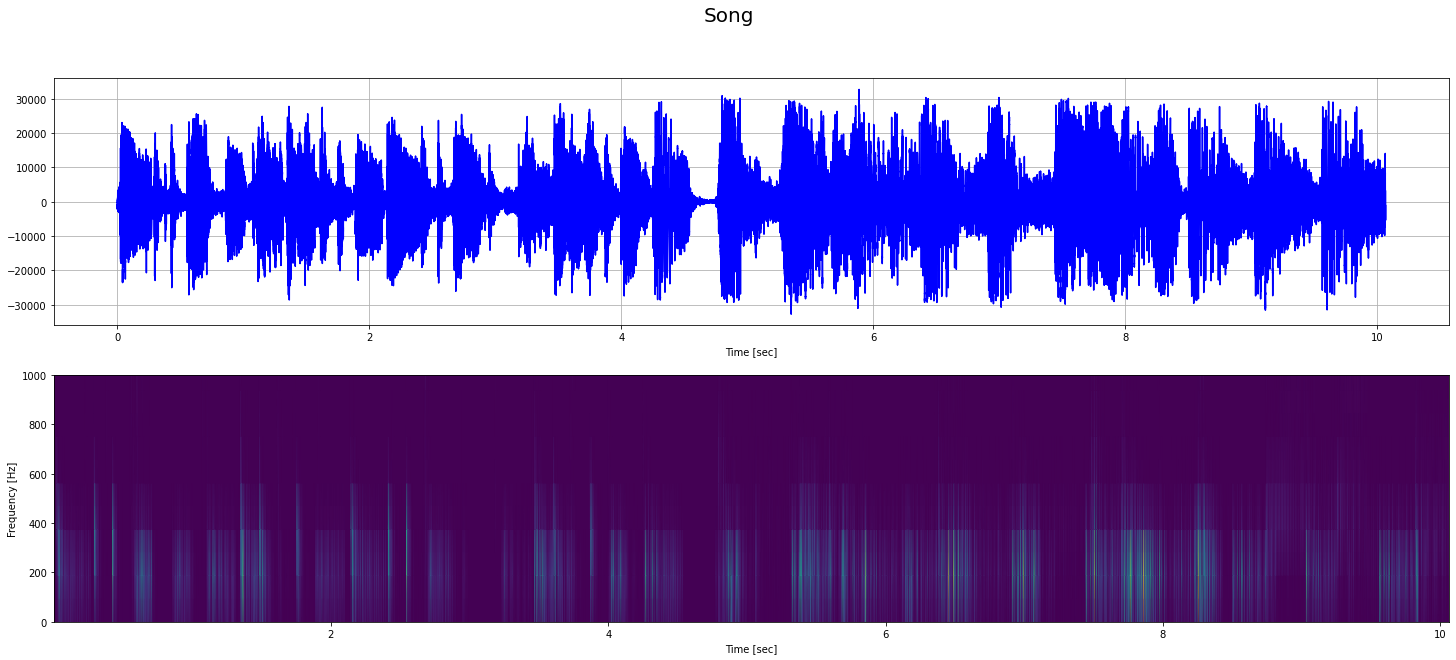

In [24]:
print_signal(np.arange(0,song.shape[0], 1) / song_rate, song, 'Song', samplerate=samplerate, xlim=None, ylim=(0, 1000))

In [25]:
# Play WAV file
Audio(song_path)

## 1.3 Señal rectangular

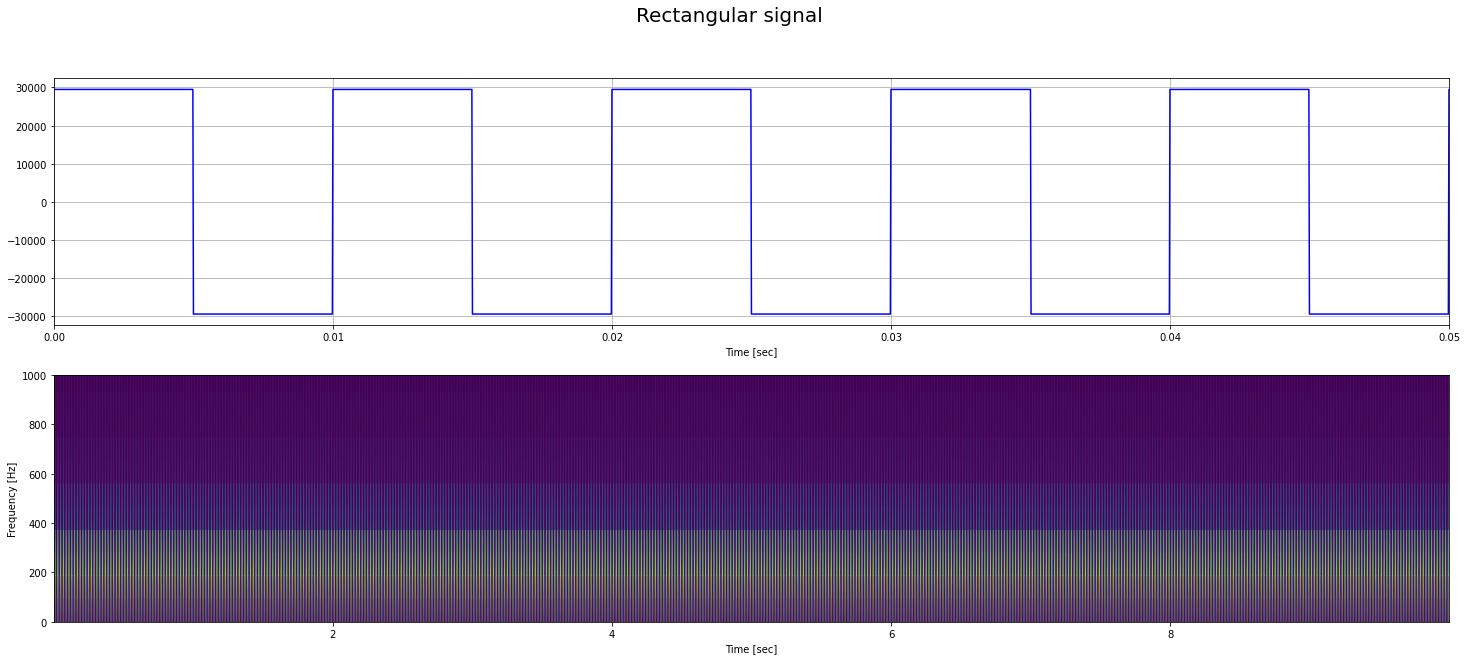

In [12]:
rec_freq = 100 # Hz

# Generate square signal
t = np.arange(0, tracklen, 1/samplerate)
rec = sps.square(t*2*np.pi*rec_freq) 

# Generate WAV file
rec_scaled = to_wav(rec, samplerate, '../assets/test_signals/rectangular.wav', scale=0.9)

# Plot scaled signal
print_signal(t, rec_scaled, 'Rectangular signal', samplerate=samplerate, xlim=(0, 0.05), ylim=(0, 1000))

In [13]:
# Play WAV file
Audio('../assets/test_signals/rectangular.wav')

## 1.4 Barrido lineal de frecuencia

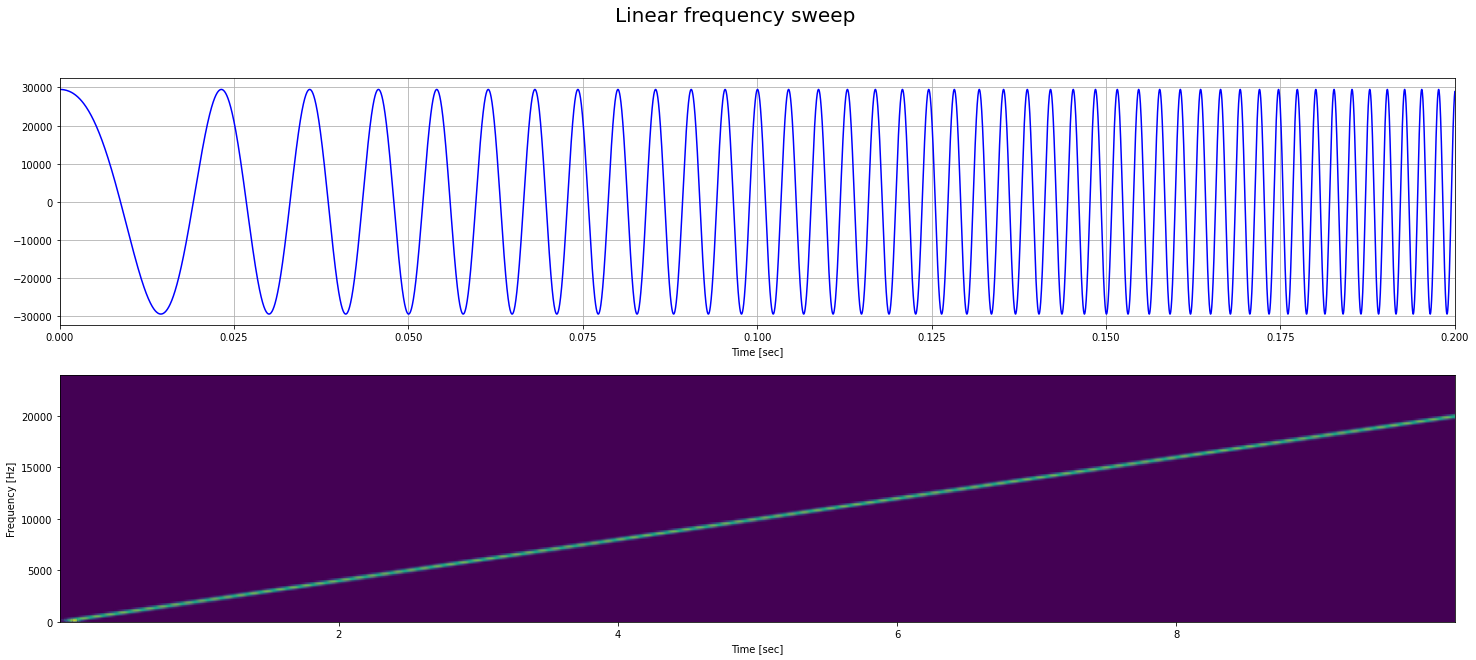

In [14]:
f0 = 20 # Hz
f1 = 20000 # Hz

# Generate frequency sweep
linear_sweep = sps.chirp(t, f0, t[-1], f1, method='linear')

# Generate WAV file
linear_sweep_scaled = to_wav(linear_sweep, samplerate, '../assets/test_signals/linear_sweep.wav', scale=0.9)

# Plot scaled signal
print_signal(t, linear_sweep_scaled, 'Linear frequency sweep', samplerate=samplerate, xlim=(0, 0.2))

In [15]:
# Play WAV file
Audio('../assets/test_signals/linear_sweep.wav')

## 1.5 Barrido exponencial de frecuencia

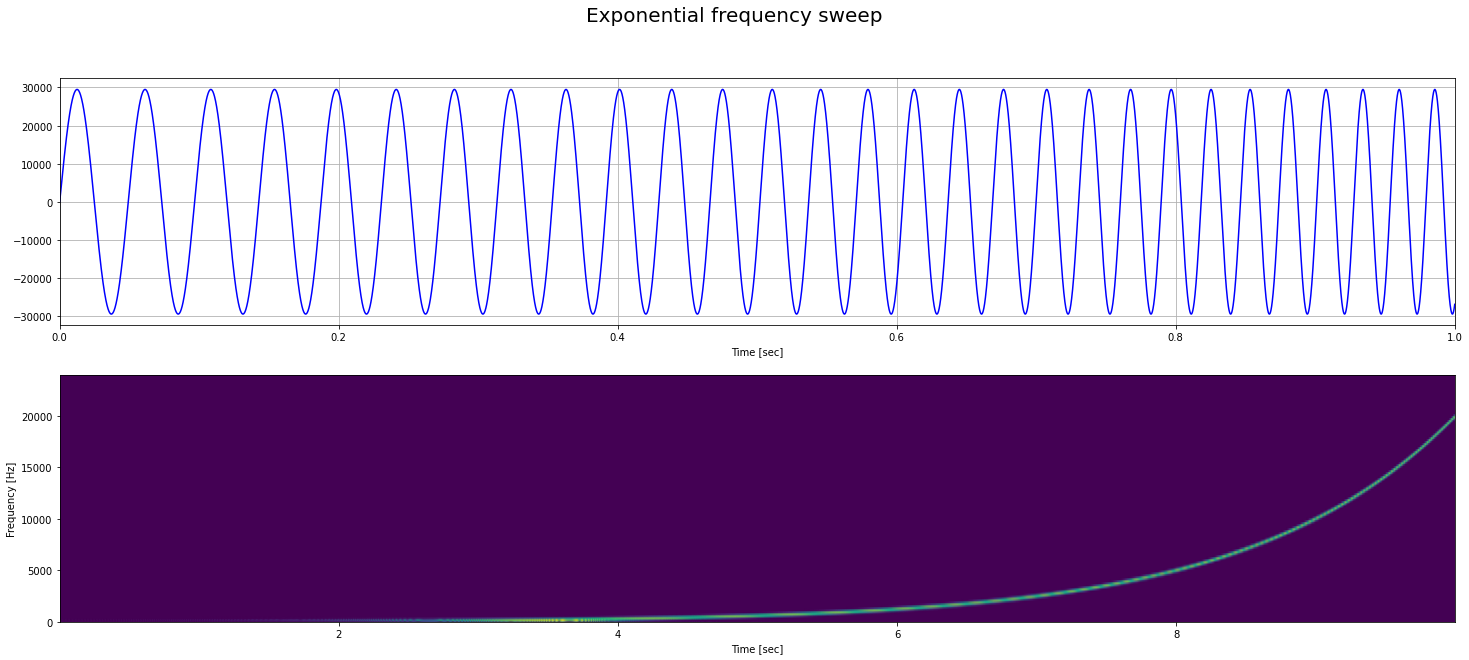

In [16]:
# First declare the variables
f0 = 20
f1 = 20e3
N = 48000
T = 10

N = T*samplerate
# create the array with times
time = np.linspace(0, N/samplerate, N)
k = (f1/f0)**(1/T)

# array with variable k^t
k_t = np.array([k**i for i in time])

# array with output signal
exp_sweep = np.sin(2*np.pi*f0*(k_t - 1)/np.log(k))

# Generate WAV file
exp_sweep_scaled = to_wav(exp_sweep, samplerate, '../assets/test_signals/exp_sweep.wav', scale=0.9)

# Plot scaled signal
print_signal(t, exp_sweep_scaled, 'Exponential frequency sweep', samplerate=samplerate, xlim=(0, 1))

## 1.6 Ruido blanco gaussiano

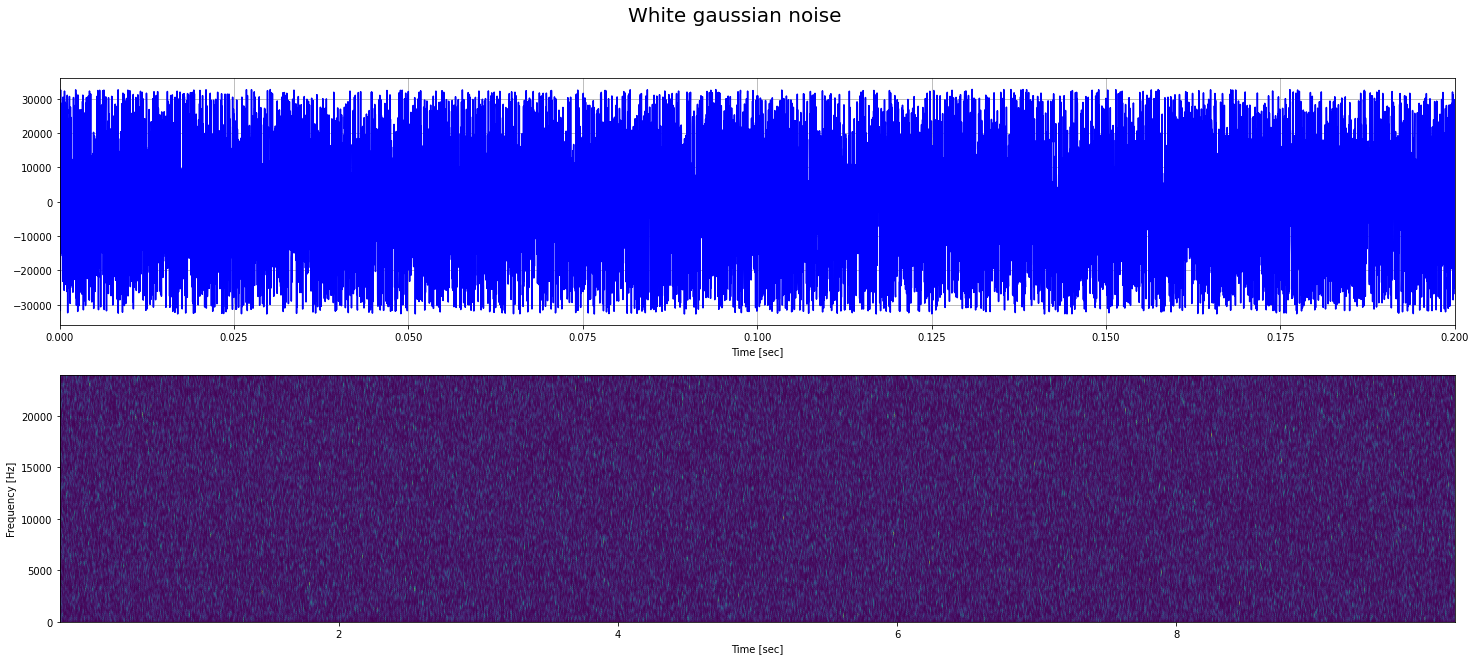

In [19]:
sigma = 1

# Generate white gaussian noise signal
wgn = np.random.normal(0, sigma, t.shape[0]) # Media 0, varianza 1. Ruido Gaussiano.

# Generate WAV file
wgn_scaled = to_wav(wgn, samplerate, '../assets/test_signals/white_noise.wav', scale=0.9)

# Plot scaled signal
print_signal(t, wgn_scaled, 'White gaussian noise', samplerate=samplerate, xlim=(0, 0.2))

In [18]:
# Play WAV file
Audio('../assets/test_signals/white_noise.wav')